Missing values handled successfully!


<Figure size 1200x800 with 0 Axes>

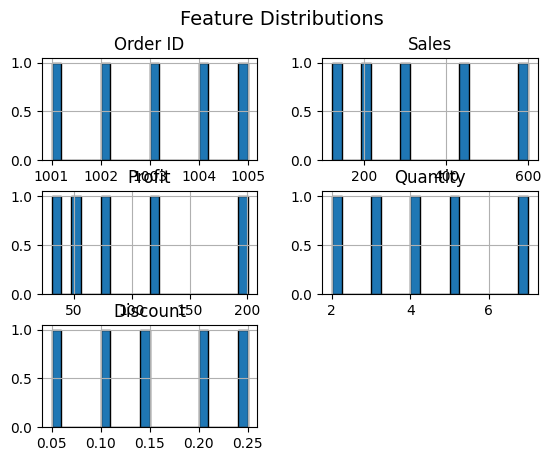

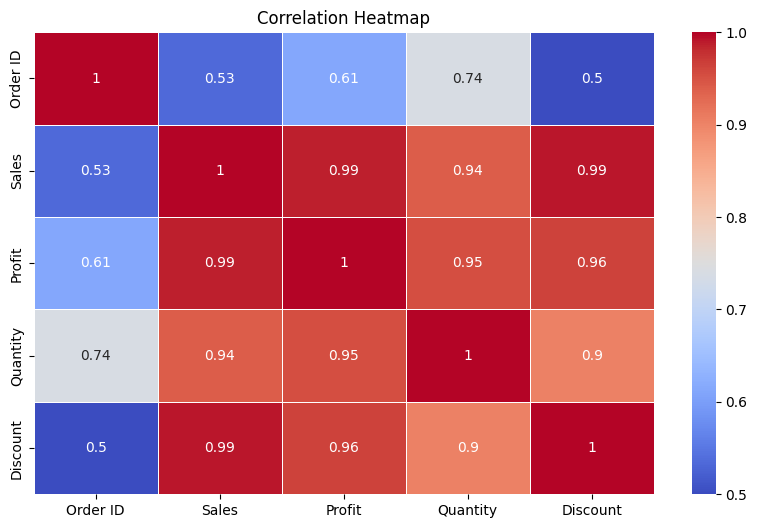

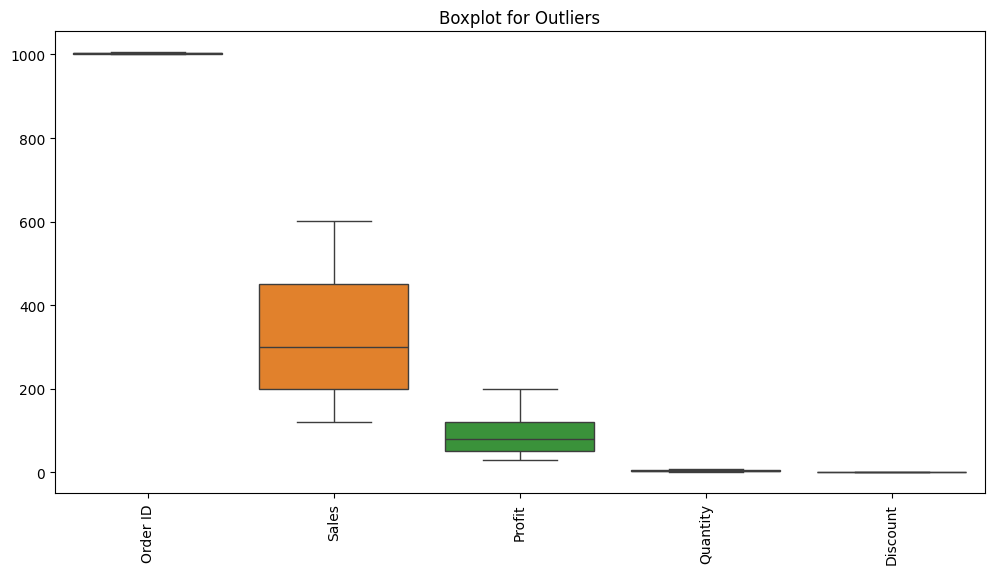

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]




00%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.54it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Reports generated: data_profile_report.html & data_report.pdf


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport  # Updated import
from reportlab.pdfgen import canvas

# Load Dataset
df = pd.read_csv("superstore_sales_data.csv")

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Handle Missing Values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill numeric columns with mean
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Fill categorical columns with mode

print("Missing values handled successfully!")

# Generate Summary Statistics
summary = df.describe()

# Data Distribution Visualization
plt.figure(figsize=(12,8))
df[numeric_cols].hist(bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot for Outliers")
plt.show()

# Generate Automated Report
profile = ProfileReport(df, explorative=True)
profile.to_file("data_profile_report.html")

# Generate PDF Report
c = canvas.Canvas("data_report.pdf")
c.drawString(100, 750, "Automated Data Analysis Report")
c.drawString(100, 730, f"Dataset Shape: {df.shape}")
c.save()

print("Reports generated: data_profile_report.html & data_report.pdf")
